In [3]:
import numpy as np 
import matplotlib.pyplot as plt

### Utilizando o método de Monte Carlo para estimar o valor de $\pi$ gerando pontos aleatórios dentro de um quadrado e verificando quantos caem dentro de um círculo inscrito.
### Considere um círculo de raio $𝑟=1$ inscrito em um quadrado de lado $2𝑟=2$, com area do circulo sendo $\pi r^2= \pi $, area do quadrado é $4$ e a razão entre as areas é $\frac{\pi}{4}$.
### Se gerarmos $N$ pontos aleatórios distribuídos uniformemente dentro do quadrado, a fração de pontos que caem dentro do círculo se aproxima de $\frac{\pi}{4}$, assim podemos estimar $\pi$ como $ \pi \approx 4 \times \frac{\text{numeros de pontos no circulo}}{\text{numero de pontos totais}} $

In [4]:
rng = np.random.default_rng() 

def monte_carlo_pi(numero_pontos):
    """
    Estima o valor de π usando o método de Monte Carlo.

    O método gera pontos aleatórios dentro do quadrado unitário [0,1] × [0,1] e conta quantos 
    desses pontos caem dentro do quarto de círculo de raio 1. A proporção de pontos dentro 
    do círculo é usada para estimar π.

    Parâmetros:
    numero_pontos :
        O número de pontos aleatórios a serem gerados para a estimativa.
    Retorna:
        A estimativa do valor de π baseada nos pontos gerados.
    """
    dentro_circulo = 0
    for _ in range(numero_pontos):
        x = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        if x**2 + y**2 <= 1:
            dentro_circulo += 1
    return 4 * dentro_circulo / numero_pontos

numero_pontos = 100000
pi = monte_carlo_pi(numero_pontos)
erro = (pi - np.pi) / np.pi

print("Valor estimado de π:", pi)
print("Valor real de π:", np.pi)
print("Erro relativo:", erro)

Valor estimado de π: 3.14096
Valor real de π: 3.141592653589793
Erro relativo: -0.00020137989216075089


In [12]:
%timeit monte_carlo_pi

24.2 ns ± 0.0547 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Agora sendo feita uma lista com os valores dentro e fora do circulo e plotando um gráfico mostrando os pontos e dentros e foras do circulo.

3.13504


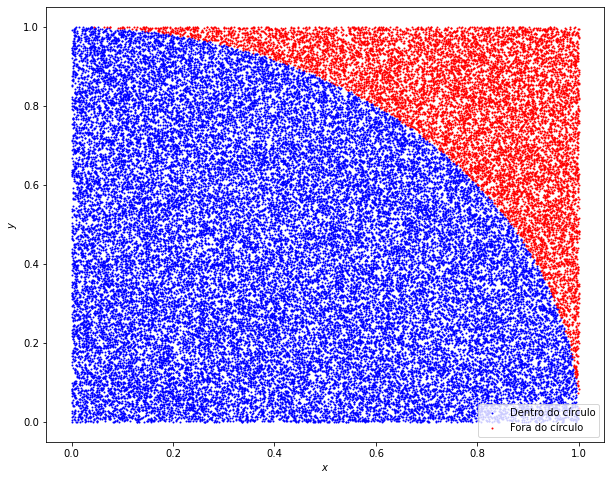

In [5]:
def monte_carlo_pi(numero_pontos: int, retorna_pontos: bool = False):
    """
    Estima o valor de π usando o método de Monte Carlo e, opcionalmente, retorna os pontos sorteados.

    Parâmetros:
    numero_pontos (int): Número de pontos aleatórios a serem gerados.
    retorna_pontos (bool): Se True, retorna listas dos pontos dentro e fora do círculo.

    Retorna:
    float: Estimativa do valor de π.
    (Opcional) Tuple[List[Tuple[float, float]], List[Tuple[float, float]]]: 
              Listas de pontos dentro e fora do círculo.
    """
    rng = np.random.default_rng()
    x = rng.uniform(0, 1, numero_pontos)
    y = rng.uniform(0, 1, numero_pontos)
    dentro = x**2 + y**2 <= 1
    pi_estimado = 4 * np.sum(dentro) / numero_pontos

    if retorna_pontos:
        pontos_dentro = [(x[i], y[i]) for i in range(numero_pontos) if dentro[i]]
        pontos_fora = [(x[i], y[i]) for i in range(numero_pontos) if not dentro[i]]
        return pi_estimado, pontos_dentro, pontos_fora
    
    return pi_estimado


numero_pontos = 50000
pi_estimado, pontos_dentro, pontos_fora = monte_carlo_pi(numero_pontos, retorna_pontos=True)


x_dentro, y_dentro = zip(*pontos_dentro)
x_fora, y_fora = zip(*pontos_fora)

print(pi_estimado)


plt.figure(figsize=(10, 8))
plt.scatter(x_dentro, y_dentro, color='blue', s=1, label="Dentro do círculo")
plt.scatter(x_fora, y_fora, color='red', s=1, label="Fora do círculo")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Atividade: Mapa Logístico

### Implemente a função $mapa_logistico(r, x_0, N)$, que calcula a evolução da população usando a equação logística:

### $x_{n+1} = r \cdot x_n \cdot (1 - x_n)$

A função deve receber:  
$ r $ (parâmetro de crescimento),  
$ x_0$  (condição inicial),  
$ N $ (número de iterações) 

e retornar uma lista com os valores de $ x_n $ para $ n = 0, 1, 2, \dots, N $.

Usando diferente valores de $r$.


In [16]:
def mapa_logistico(r, x0, N):
    """
    Calcula a evolução do mapa logístico ao longo de N iterações.

    A equação do mapa logístico é definida como:
        x_{n+1} = r * x_n * (1 - x_n)

    Onde:
    - `r` é o parâmetro de crescimento (0 < r <= 4).
    - `x0` é a condição inicial da população (0 < x0 < 1).
    - `N` é o número de iterações a serem realizadas.

    Parâmetros:
    ----------
    r : float
        Parâmetro de crescimento do modelo logístico.
    x0 : float
        Condição inicial da população (deve estar no intervalo (0,1)).
    N : int
        Número total de iterações.

    Retorna:
    -------
    list of float
        Lista contendo a evolução da população ao longo das iterações.
    """
    x_values = [x0]
    
    for n in range(1, N + 1):
        x_next = r * x_values[-1] * (1 - x_values[-1])
        x_values.append(x_next)
    
    return x_values

r = 2  
x0 = 0.3  # entre 0 e 1
N = 100  

result = mapa_logistico(r, x0, N)

print(result[:20])

[0.3, 0.42, 0.4872, 0.49967231999999995, 0.4999997852516352, 0.4999999999999078, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994, 0.49999999999999994]


### Atividade: Visualização do Mapa Logístico

Faça gráficos da evolução da população $ x_n $ ao longo do tempo para diferentes valores do parâmetro de crescimento $ r $.  


Plote $ x_n $ vs. $ n $ para $ n $ variando de 0 a pelo menos 1000.  
Utilize os seguintes valores de $ r $:  
   - $ r = 2 $  
   - $ r = 3.3 $  
   - $ r = 3.5 $  
   - $ r = 3.9 $  
Sempre inicie com a condição inicial $ x_0 = \frac{1}{2} $.  

Analise os diferentes padrões de comportamento do sistema para cada valor de $ r $.


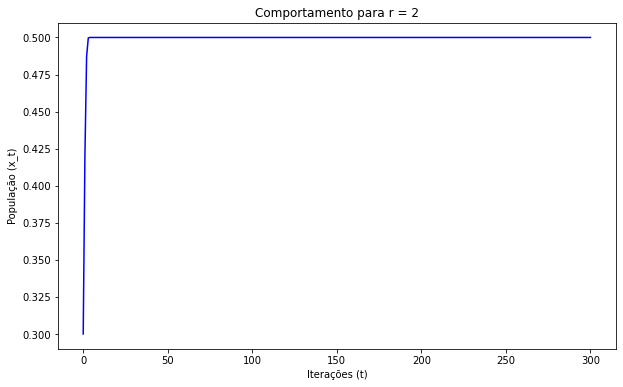

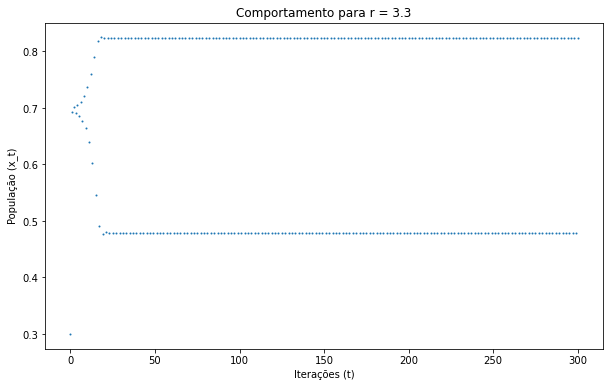

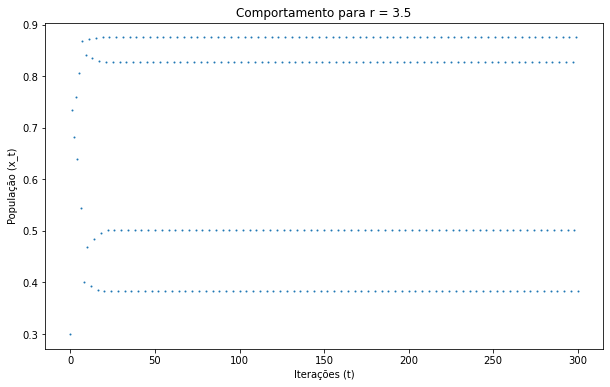

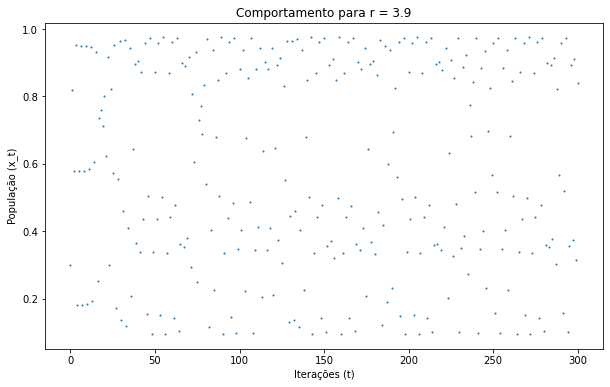

In [14]:
# Função mapa_logistico que implementa a equação logística
def mapa_logistico(r, x0, N):
    """
    Calcula a evolução do mapa logístico para um dado número de iterações.

    A equação logística é dada por:
        x_{t+1} = r * x_t * (1 - x_t)

    Onde:
    - `r` é o parâmetro de crescimento.
    - `x0` é a condição inicial da população (0 < x0 < 1).
    - `N` é o número de iterações.

    Parâmetros:
    ----------
    r : float
        Parâmetro de crescimento do modelo logístico.
    x0 : float
        Condição inicial da população.
    N : int
        Número de iterações a serem realizadas.

    Retorna:
    -------
    list of float
        Lista contendo a evolução da população ao longo das iterações.
    """
    x_values = [x0]
    for t in range(1, N + 1):
        x_t = r * x_values[t - 1] * (1 - x_values[t - 1])
        x_values.append(x_t)
    return x_values

# Parâmetros
x0 = 0.3  # Condição inicial
N = 300  # Número de iterações

# Gráfico para r = 2
r = 2
x_values_r2 = mapa_logistico(r, x0, N)
plt.figure(figsize=(10, 6))
plt.plot(x_values_r2, label=f"r = {r}", color='blue')
plt.title(f"Comportamento para r = {r}", fontsize=12)
plt.xlabel('Iterações (t)', fontsize=10)
plt.ylabel('População (x_t)', fontsize=10)
plt.show()

# Gráfico para r = 3.3
r = 3.3
x_values_r3_3 = mapa_logistico(r, x0, N)
plt.figure(figsize=(10, 6))
plt.scatter(range(N + 1), x_values_r3_3, label=f"r = {r}", s=1)
plt.title(f"Comportamento para r = {r}", fontsize=12)
plt.xlabel('Iterações (t)', fontsize=10)
plt.ylabel('População (x_t)', fontsize=10)
plt.show()

# Gráfico para r = 3.5
r = 3.5
x_values_r3_5 = mapa_logistico(r, x0, N)
plt.figure(figsize=(10, 6))
plt.scatter(range(N + 1), x_values_r3_5, label=f"r = {r}", s=1)
plt.title(f"Comportamento para r = {r}", fontsize=12)
plt.xlabel('Iterações (t)', fontsize=10)
plt.ylabel('População (x_t)', fontsize=10)
plt.show()

# Gráfico para r = 3.9
r = 3.9
x_values_r3_9 = mapa_logistico(r, x0, N)
plt.figure(figsize=(10, 6))
plt.scatter(range(N + 1), x_values_r3_9, label=f"r = {r}", s=1)
plt.title(f"Comportamento para r = {r}", fontsize=12)
plt.xlabel('Iterações (t)', fontsize=10)
plt.ylabel('População (x_t)', fontsize=10)
plt.show()


## codigo da pagina https://github.com/costadr/logistic_map_python/blob/main/main.py 

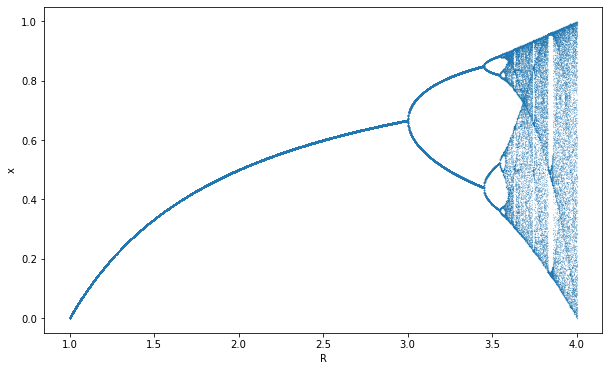

In [21]:
def mapa(x0, R):
    """ definindo uma função chamada 'mapa', que retorna o valor de x1 para um dado x0 e R """
    return x0*R*(1-x0)


# criando um diagrama de bifurcação
R_list = np.linspace(1, 4, 2000)
transient = 1000
maxiter = 100
nponto = 0 # contador que é incrementado sempre que salvamos um novo ponto

# criamos dois arrays que salvarão os resultados obtidos
eixo_horizontal = np.zeros(len(R_list)*maxiter)
eixo_vertical = np.zeros(len(R_list)*maxiter)

for R in R_list:
    x0 = 0.2 # começamos sempre com x0=0.2

    # pulando o tempo de transiente
    for iter in range(transient):
        x0 = mapa(x0, R)

    # após pular o transiente, salvamos os pontos nos dois arrays
    # chamados eixo_horizontal e eixo_vertical
    for iter in range(maxiter):
        x0 = mapa(x0, R)

        eixo_horizontal[nponto] = R
        eixo_vertical[nponto] = x0
        nponto += 1


plt.figure(figsize=(10, 6))
plt.xlabel('R')
plt.ylabel('x')
plt.plot(eixo_horizontal, eixo_vertical, 'o', markersize=0.1)
plt.show()